In [ ]:
import gymnasium as gym
import wandb
from wandb.integration.sb3 import WandbCallback
from stable_baselines3.common.callbacks import CheckpointCallback, CallbackList
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from torch import nn
import os
# Initialize a wandb run. The parameters below allow you to:
# - sync tensorboard logs (which SB3 produces)
# - automatically log environment videos if available
# generate a date time stamp for the run
run = wandb.init(
    project="mappo",   # Replace with your wandb project name
    entity="stable_baselines3_marl",       # (Optional) your wandb username or team name
    # id = "",          # Comment this out if you want a new run each time
    sync_tensorboard=True,              # Auto-upload tensorboard metrics
    monitor_gym=True,                   # Auto-upload videos of your agent (if env supports it)
    save_code=True,                     # (Optional) Save a snapshot of your code
)
# Specify the directory to save checkpoints
save_dir = "./models"
os.makedirs(save_dir, exist_ok=True)

vec_env = make_vec_env("LQR-v2", n_envs=8)


# Create a CheckpointCallback to save the model every 10,000 timesteps
checkpoint_callback = CheckpointCallback(
    save_freq=10_000,               # Save frequency in timesteps
    save_path=save_dir,            # Directory to save checkpoints
    name_prefix=run.id+"_"+vec_env.envs[0].spec.id+"/policy_checkpoint"
)
# Create a WandbCallback to log training metrics and videos
wandb_callback = WandbCallback()
# Combine the callbacks into a CallbackList
callback = CallbackList([checkpoint_callback, wandb_callback])
# Parallel environments
policy_kwargs = dict(
    activation_fn=nn.ReLU,  # Change activation function to ReLU
    net_arch=[dict(pi=[64, 64], vf=[64, 64])]
)

model = PPO("MlpPolicy", vec_env, policy_kwargs=policy_kwargs, verbose=1,tensorboard_log=f"runs/{run.id}")
model.learn(total_timesteps=8_00_000, callback=callback, )

run.finish()


# del model # remove to demonstrate saving and loading

# model = PPO.load("ppo_cartpole")



wandb: Currently logged in as: jingqi_li (stable_baselines3_marl) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


/mnt/2312dd0d-0348-41b0-8596-b79a2cc21f6b/sb3game/lib/python3.10/site-packages/gymnasium/envs/registration.py:517: DeprecationWarning: WARN: The environment LQR-v2 is out of date. You should consider upgrading to version `v3`.
  logger.deprecation(
/mnt/2312dd0d-0348-41b0-8596-b79a2cc21f6b/github/stable-baselines3-game-theoretic-MARL/stable_baselines3/common/policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


Using cuda device
Logging to runs/4qoztds1/PPO_1


/mnt/2312dd0d-0348-41b0-8596-b79a2cc21f6b/github/stable-baselines3-game-theoretic-MARL/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 59.9     |
|    ep_rew_mean     | 61.7     |
| time/              |          |
|    fps             | 8493     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 63.9        |
|    ep_rew_mean          | 63.7        |
| time/                   |             |
|    fps                  | 4576        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.006097003 |
|    clip_fraction        | 0.0446      |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.68       |
|    explained_variance   | -0.00109    |
|    learning_rate        | 0.

/mnt/2312dd0d-0348-41b0-8596-b79a2cc21f6b/github/stable-baselines3-game-theoretic-MARL/stable_baselines3/common/save_util.py:284: UserWarning: Path 'models/4qoztds1_LQR-v2' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 187         |
|    ep_rew_mean          | 256         |
| time/                   |             |
|    fps                  | 3723        |
|    iterations           | 6           |
|    time_elapsed         | 13          |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.015620368 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -5.56       |
|    explained_variance   | 0.75        |
|    learning_rate        | 0.0003      |
|    loss                 | 25.9        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0264     |
|    std                  | 0.969       |
|    value_loss           | 63.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |       

global_step,▁▁▁▁▁▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇█████
rollout/ep_len_mean,▁▂▄▆▇███████████████████████████████████
rollout/ep_rew_mean,▁▁▂▄▇▇▇█████████████████████████████████
time/fps,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/approx_kl,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▂▂▂▂▂▂▂▃▃▄▂▄▂▃▇▂▂▄█▄▄
train/clip_fraction,▁▂▄▅▆▄▄▄▄▅▅▅▄▆▅▅▅▅▅▅▆▅▆▆▇▇▆▇▇▇█▇▇████▇██
train/clip_range,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/entropy_loss,▁▁▁▁▁▂▂▂▃▃▃▃▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████
train/explained_variance,▁▆▆▄▃▅▆▆▆▇██████████████████████████████
train/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/loss,▆█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [2]:
# model.save("ppo_LQR_v3")
vec_env.envs[0]

<Monitor<TimeLimit<OrderEnforcing<PassiveEnvChecker<LQR_Env2<LQR-v2>>>>>>

In [9]:
# visualize the trained agent's value function

import torch as th

# Create your environment and model (example with CartPole)
env = make_vec_env("LQR-v2", n_envs=1)
gym_env = gym.make("LQR-v2")
# Assume you have a state (observation) as a NumPy array.
# For a single state from CartPole, the shape is usually (4,).
state = env.reset()[0]  # Take the first observation from the vectorized env

# Convert state to a PyTorch tensor and add a batch dimension
obs_tensor = th.as_tensor(state).float().unsqueeze(0).to(model.device)

# Disable gradient calculations for evaluation
with th.no_grad():
    # The forward pass of the policy typically returns a tuple.
    # For actor–critic policies, the tuple is usually:
    # (action_distribution or action, value, log_probability) 
    # (depending on the implementation)
    # Here we extract the value estimate.
    _, value, _ = model.policy(obs_tensor)

# Since value is a tensor with a batch dimension, get the scalar value
print("Estimated value:", value.item())


Estimated value: 196.8645477294922


/mnt/2312dd0d-0348-41b0-8596-b79a2cc21f6b/sb3game/lib/python3.10/site-packages/gymnasium/envs/registration.py:517: DeprecationWarning: WARN: The environment LQR-v2 is out of date. You should consider upgrading to version `v3`.
  logger.deprecation(


In [4]:
model.policy.eval()
# model.policy.train()

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=8, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
    )
    (value_net): Sequential(
      (0): Linear(in_features=8, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): ReLU()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [10]:
# plot the value function for x and y ranging from -2 to 2
import numpy as np

# Create a grid of (x, y) coordinates
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
# Stack the coordinates to a NumPy array of shape (n_points, 2)
Z = np.stack((X, Y), axis=-1).reshape(-1, 2)
# Get the value estimates
values = np.zeros((100, 100))
for ii, xx in enumerate(x):
    for jj, yy in enumerate(y):
        state = np.array([xx, yy, 0, 0, 1,1,0,0])
        obs_tensor = th.as_tensor(state).float().unsqueeze(0).to(model.device)
        with th.no_grad():
            _, value, _ = model.policy(obs_tensor)
            values[ii, jj] = value.item()


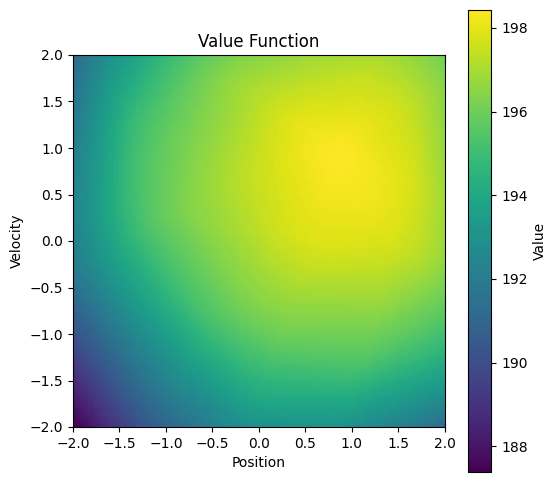

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
# plt.imshow(values, extent=(-2, 2, -2, 2))
# plot the surface
plt.imshow(values, extent=(-2, 2, -2, 2), origin='lower')
plt.colorbar(label='Value')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Value Function')
plt.show()


In [17]:
model.load("./models/hsj05cvl_LQR-v2/policy_checkpoint_480000_steps.zip")

In [14]:
model.load("./models/4qoztds1_LQR-v2/policy_checkpoint_760000_steps.zip")

/mnt/2312dd0d-0348-41b0-8596-b79a2cc21f6b/github/stable-baselines3-game-theoretic-MARL/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [5]:
import numpy as np

In [15]:
# simulate the trajectory of an agent in the environment
initial_state = np.array([-1,-1,0,0,1,1,0,0])
x0 = gym_env.reset(options = {"initial_state": initial_state})[0]
# we do simulation
horizon = 100
x_traj = np.zeros((horizon+1, env.observation_space.shape[0]))
x_traj[0] = x0
rew_traj = np.zeros(horizon)
for t in range(0, horizon):
    action, _ = model.predict(x_traj[t])
    x_traj[t+1], rew_traj[t], _, _, _ = gym_env.step(action)

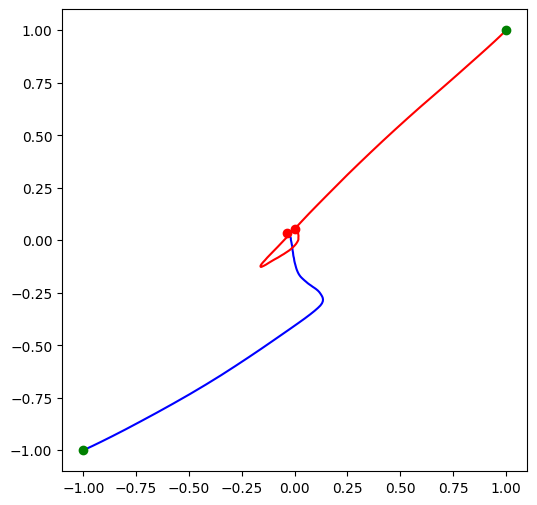

In [16]:
# plot the trajectory
plt.figure(figsize=(6, 6))
plt.plot(x_traj[:, 0], x_traj[:, 1], 'b')
plt.plot(x_traj[0, 0], x_traj[0, 1], 'go', label='start')
plt.plot(x_traj[-1, 0], x_traj[-1, 1], 'ro', label='end')
plt.plot(x_traj[:, 4], x_traj[:, 5], 'r')
plt.plot(x_traj[0, 4], x_traj[0, 5], 'go', label='start')
plt.plot(x_traj[-1, 4], x_traj[-1, 5], 'ro', label='end')